In [14]:
import train_reg
import train
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
%matplotlib inline

current_folder = Path("")
dataset_folder = current_folder / "dataset"
images_folder = dataset_folder / "images"
models_folder = current_folder / "models"

X_train, X_test, y_train, y_test = train_reg.load_dataset(dataset_folder)
#X_train, X_test, y_train, y_test = train.load_dataset(dataset_folder)

In [21]:
def print_class(y):
    if y.shape[1] == 1:
        print(f"Left {np.sum(y == -0.25) / len(y):.2f} Straight {np.sum(y == 0.0) / len(y):.2f} Right {np.sum(y == 0.25) / len(y):.2f}")
        print(f"Left {np.sum(y == -0.25)} Straight {np.sum(y == 0.0)} Right {np.sum(y == 0.25)} Total {len(y)}")
    else:
        l_sum, s_sum, r_sum = np.sum(y, axis=0)
        print(f"Left {l_sum/len(y):.2f} Straight {s_sum/len(y):.2f} Right {r_sum/len(y):.2f}")
        print(f"Left {l_sum} Straight {s_sum} Right {r_sum}")

print_class(y_train)


Left 0.46 Straight 0.22 Right 0.32
Left 10857 Straight 5250 Right 7655 Total 23762


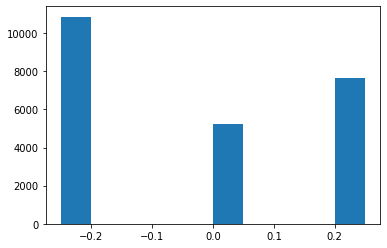

In [63]:
plt.hist(y_train)
plt.show()

C:\Users\iuayala\Envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(array([10857.,     0.,     0.,     0.,     0., 10857.,     0.,     0.,
            0., 10857.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

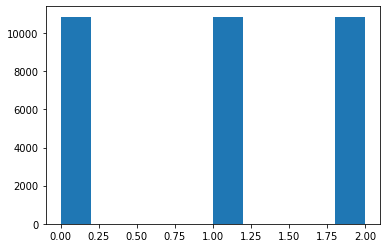

In [79]:
# Balance
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

X_flat = np.reshape(X_train, (X_train.shape[0], int(np.product(X_train.shape) / X_train.shape[0])))

smote = SMOTE(n_jobs=-1)
X_train_os, y_train_os = smote.fit_resample(X_flat, y_train_enc)

X_train_os_rs = np.reshape(X_train_os, tuple([X_train_os.shape[0]]) + X_train.shape[1:])

plt.hist(y_train_os)

#print_class(y_train_os)

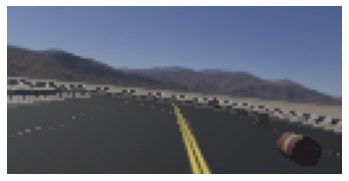

In [107]:
import cv2

def get_image(index):
    image = X_train_os_rs[index]
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

image_rgb = get_image(30000) 

plt.axis("off")
plt.imshow(image_rgb)

rows 4 cols 3


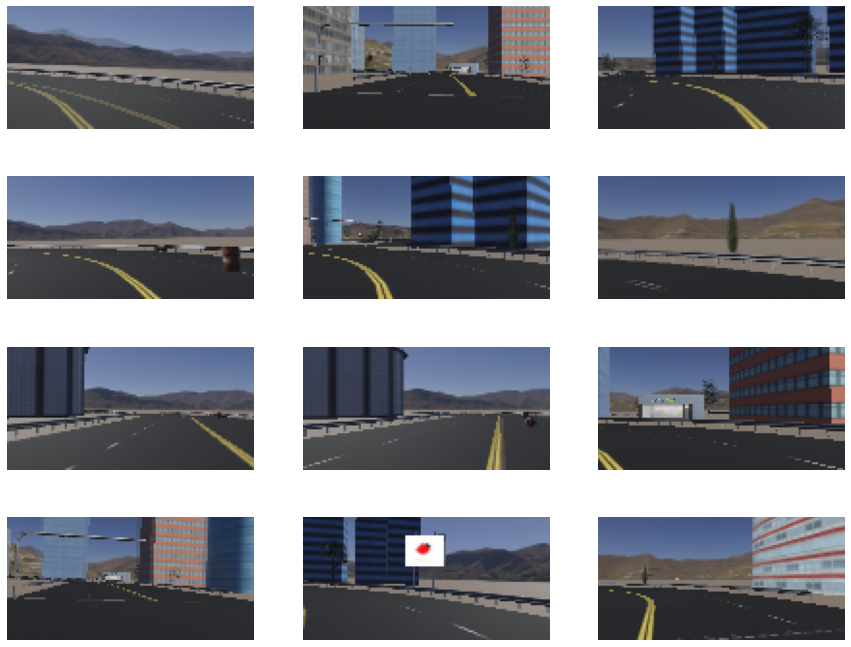

In [150]:
plt.rcParams['figure.figsize'] = [15, 12]

def plot_images(indexes):
    n = len(indexes)
    cols = 3
    rows = int(np.ceil(n / cols))
    print("rows", rows, "cols", cols)
    f, axarr = plt.subplots(rows, cols)
    for i, index in enumerate(indexes):
        r, c = int(np.floor(i / cols)), int(i % cols)
        axarr[r, c].imshow(get_image(index))
        axarr[r, c].axis("off")

# Greater than 23762 are generate by SMOTE
plot_images(list(range(23763, 23775)))

rows 4 cols 3


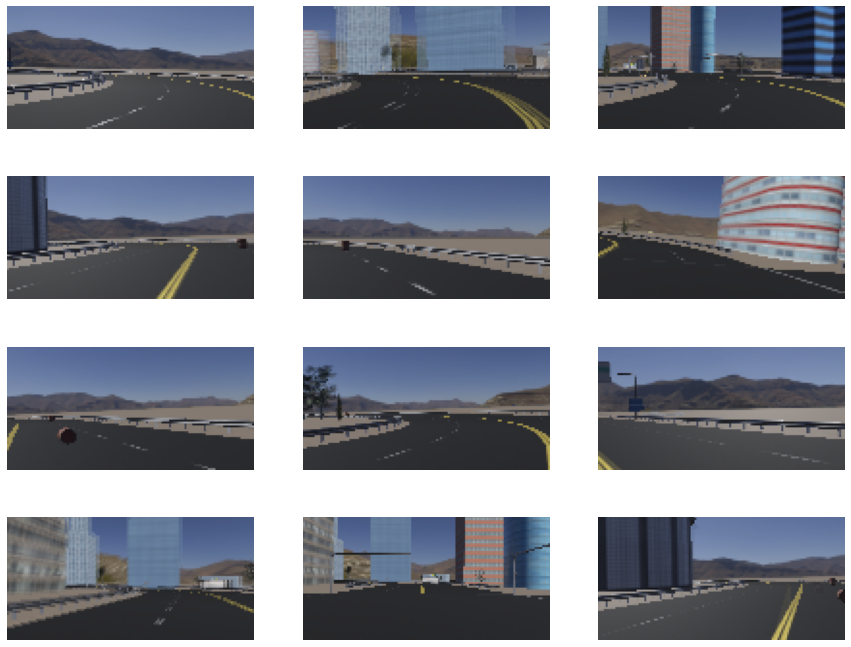

In [151]:
plot_images(list(range(24763, 24775)))

In [103]:
np.sum(X_train_os_rs[:23762] == X_train) / 64 / 128 / 3

23762.0

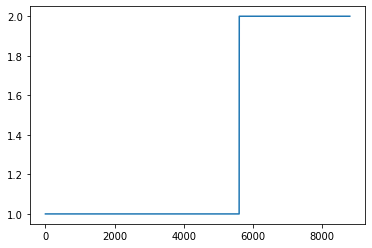

In [114]:
plt.plot(y_train_os[23762:]) # sorted